In [3]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
from sklearn.datasets import load_iris
from nlp_ood_detection.data_depth.similarity_scorer import IRW
from nlp_ood_detection.data_depth.utils import load_data
import pandas as pd

## Integrated weigthed rank - IRIS dataset

In [5]:
n_samples = 1000 
n_dim = 2

data_train, _, x_grid, xx, yy = load_data()

In [8]:
irw = IRW(data_train, num_dim=n_dim, num_samples=n_samples)
dirw = irw.score(x_grid)

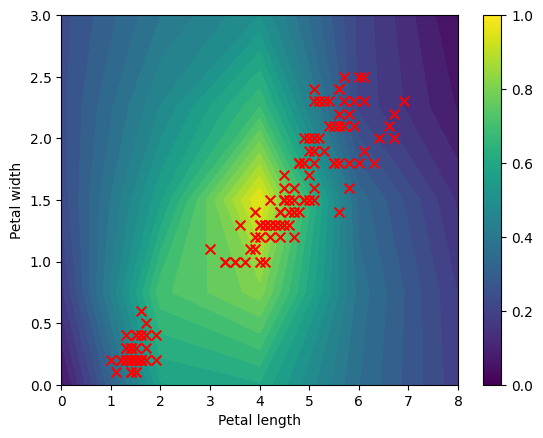

In [9]:
plt.contourf(xx, yy, dirw.reshape(xx.shape), levels=30, cmap='viridis')
plt.scatter(data_train[:, 0], data_train[:, 1],
            label='Train data', marker='x', c='r', s=50)
plt.colorbar()
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

## IRW on the latent space

In [19]:
df = pd.read_parquet("../data/latent_imdb_mean.parquet.parquet") 

In [20]:
x_min = 0
x_max = 8
y_min = 0
y_max = 8
grid_size = 5


x = np.linspace(x_min, x_max, grid_size)
y = np.linspace(y_min, y_max, grid_size)
xx, yy = np.meshgrid(x, y)
x_grid = np.c_[xx.ravel(), yy.ravel()]

In [21]:
x_train = df.drop("label", axis=1).to_numpy()
y_train = df["label"].to_numpy()

In [22]:
n_samples = 100 
n_dim = x_train.shape[1]

irw = IRW(x_train, y_train,num_dim=n_dim, num_samples=n_samples, feature=list(range(n_dim)))

In [23]:
dirw = irw.score(x_train, y_train)

(array([3., 5.]),
 array([0.11    , 0.194375, 0.27875 ]),
 <BarContainer object of 2 artists>)

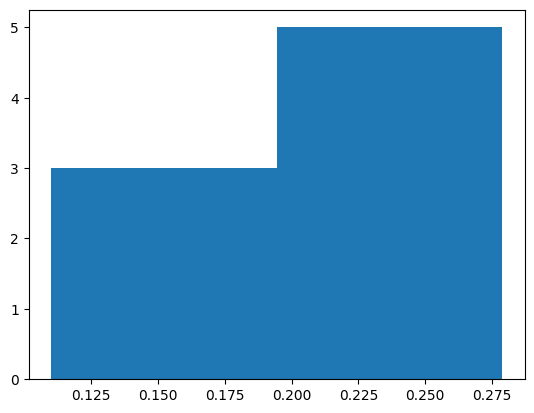

In [18]:
plt.hist(dirw, bins=2)

Plotting the last batch: 


/tmp/ipykernel_29975/1414992255.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


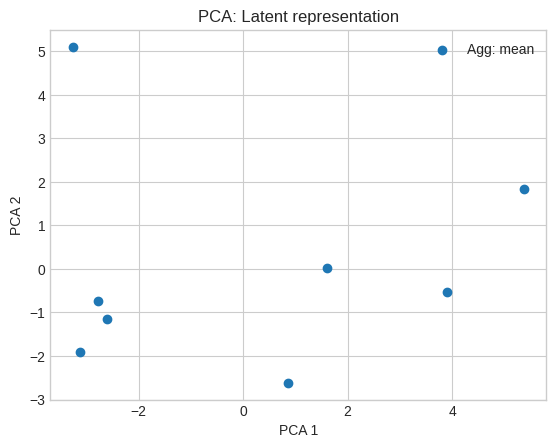

In [5]:
from sklearn.decomposition import PCA


print("Plotting the last batch: ")

plt.style.use("seaborn-v0_8-whitegrid")
aggregation = "mean"
pca = PCA(n_components=2)
transformed = pca.fit_transform(df.drop(columns=["label"]).values)
plt.scatter(
    transformed[:, 0],
    transformed[:, 1],
    label=f"Agg: {aggregation}",
    cmap="tab10",
)
plt.title(f"PCA: Latent representation")
plt.legend()
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
